In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/ESCA/166f355b-da44-426d-8660-6ed5cad6538d___FAM_B.Msls 0935_flipLR.JPG
/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/ESCA/_1094_1509647.png
/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/ESCA/7cfedcef-5591-4ceb-8cec-cd4612777392___FAM_B.Msls 4327.JPG
/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/ESCA/47274876-8fe2-4ad8-8e5d-08e3b96ac5d0___FAM_B.Msls 1341_flipLR.JPG
/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/ESCA/_812_3018719.png
/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/ESCA/_1852_9130551.png
/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/ESCA/df11f62e-738e-4879-b37c-8f6ba65cde0c___FAM_B.Msls 1129.JPG
/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/ESCA/_200_7274294.png
/kaggle/input/augmented-grape-di

## Üzüm Yapraklarındaki Hastalıkların Derin Öğrenme ile Tanımlanması

#### Bu proje, üzüm yapraklarındaki çeşitli hastalıkların tanımlanmasını amaçlayan bir makine öğrenimi uygulamasıdır. Bu tür bir uygulama, tarım sektöründe bitki sağlığını izlemek ve hastalıkları erken teşhis etmek için büyük önem taşır. Bu projede, üzüm yapraklarının görüntülerini kullanarak dört farklı durumu (Black Rot, ESCA, Healthy, Leaf Blight) sınıflandırmak için derin öğrenme modelleri geliştirdik.

In [3]:
# Dosya yollarını saklamak için boş bir liste oluşturuyoruz
file_paths = []

In [13]:
dataset = '/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data'

In [14]:
# Kategorileri başlık için yazalım
categories = ['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']

In [15]:
# Her kategori için dosya yollarını listeye ekliyoruz
for category in categories:
    category_path = os.path.join(dataset, category)
    for dirname, _, filenames in os.walk(category_path):
        for filename in filenames:
            file_paths.append((category, os.path.join(dirname, filename)))

In [16]:
# Listeyi bir DataFrame'e dönüştürüyoruz
df = pd.DataFrame(file_paths, columns=['Category', 'FilePath'])

In [19]:
df.head()

,Category,FilePath
0,Black Rot,/kaggle/input/augmented-grape-disease-detectio...
1,Black Rot,/kaggle/input/augmented-grape-disease-detectio...
2,Black Rot,/kaggle/input/augmented-grape-disease-detectio...
3,Black Rot,/kaggle/input/augmented-grape-disease-detectio...
4,Black Rot,/kaggle/input/augmented-grape-disease-detectio...


In [18]:
df.shape

(12000, 2)

In [34]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [21]:
# DataFrame'i eğitim ve test veri setlerine ayırıyoruz
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Eğitim seti boyutu: {len(train_df)}")
print(f"Test seti boyutu: {len(test_df)}")

Eğitim seti boyutu: 9600
Test seti boyutu: 2400


In [22]:
# Görüntüleri yüklüyoruz ve ardından yeniden boyutlandırıyoruz
def load_and_preprocess_image(filepath):
    img = cv2.imread(filepath)
    img = cv2.resize(img, (128, 128))  # Görüntü yeniden boyutlama
    img = img / 255.0  # Normalizasyon
    return img

In [24]:
import cv2

In [25]:
# Eğitim veri seti için görüntüleri ve etiketleri hazırlama
train_images = np.array(list(map(load_and_preprocess_image, train_df['FilePath'].values)))
train_labels = np.array(list(map(lambda x: categories.index(x), train_df['Category'].values)))

In [26]:
# Aynı işlemi testt için yapıyoruz.
test_images = np.array(list(map(load_and_preprocess_image, test_df['FilePath'].values)))
test_labels =np.array(list(map(lambda x : categories.index(x), test_df['Category'].values)))

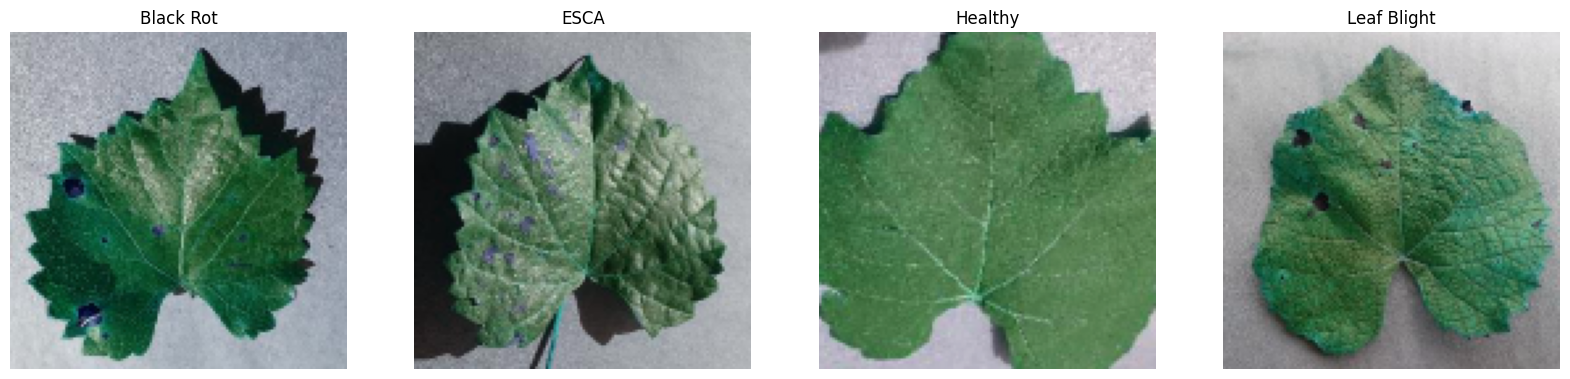

In [31]:
import matplotlib.pyplot as plt

# Her kategoriden bir örnek görüntüye bakalım.
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, category in enumerate(categories):
    sample_file = train_df[train_df['Category'] == category]['FilePath'].values[0]
    img = load_and_preprocess_image(sample_file)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

plt.show()

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

In [46]:
model = Sequential()
model.add(InputLayer(input_shape =(128,128,3)))#  # Her resmin 128x128 piksel girişi var
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'))# 32 filtre ve 3 e 3 strike ediyoruz
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))# 64 filtre ve 3 e 3 strike ediyoruz
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))  # 512 nöronlu tam bağlantılı katman
model.add(Dropout(0.5))  # %50 oranında Dropout yaptık
model.add(Dense(4, activation='softmax')) # 4 tane sınıf var
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics = ['accuracy'])

In [47]:
# Modelin özetini yazdırıyoruz.
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692,132 (14.08 MB)

 Trainable params: 3,692,132 (14.08 MB)

 Non-trainable params: 0 (0.00 B)

#### Modelin eğitilmesi

In [48]:
history = model.fit(train_images, train_labels, validation_split = .10, epochs =10)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 70s 252ms/step - accuracy: 0.6275 - loss: 0.8991 - val_accuracy: 0.8990 - val_loss: 0.2702
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 67s 247ms/step - accuracy: 0.8743 - loss: 0.3254 - val_accuracy: 0.9187 - val_loss: 0.2129
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 67s 248ms/step - accuracy: 0.9093 - loss: 0.2586 - val_accuracy: 0.9208 - val_loss: 0.1931
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 67s 247ms/step - accuracy: 0.9224 - loss: 0.1973 - val_accuracy: 0.9281 - val_loss: 0.1697
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 81s 244ms/step - accuracy: 0.9389 - loss: 0.1665 - val_accuracy: 0.9438 - val_loss: 0.1338
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 82s 246ms/step - accuracy: 0.9609 - loss: 0.1186 - val_accuracy: 0.9500 - val_loss: 0.1195
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 67s 249ms/step - accuracy: 0.9665 - loss: 0.0915 - val_accuracy: 0.9396 - val_loss: 0.1502
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 67s 247ms/step - accuracy: 0.9676 - loss: 0

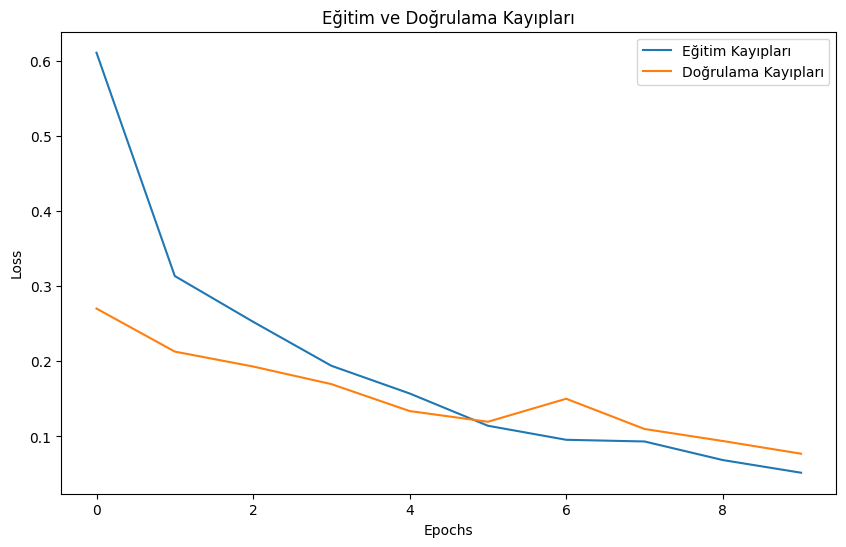

In [49]:
# Eğitim ve doğrulama kayıplarını görselleştirelim
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Eğitim Kayıpları')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıpları')
plt.title('Eğitim ve Doğrulama Kayıpları')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

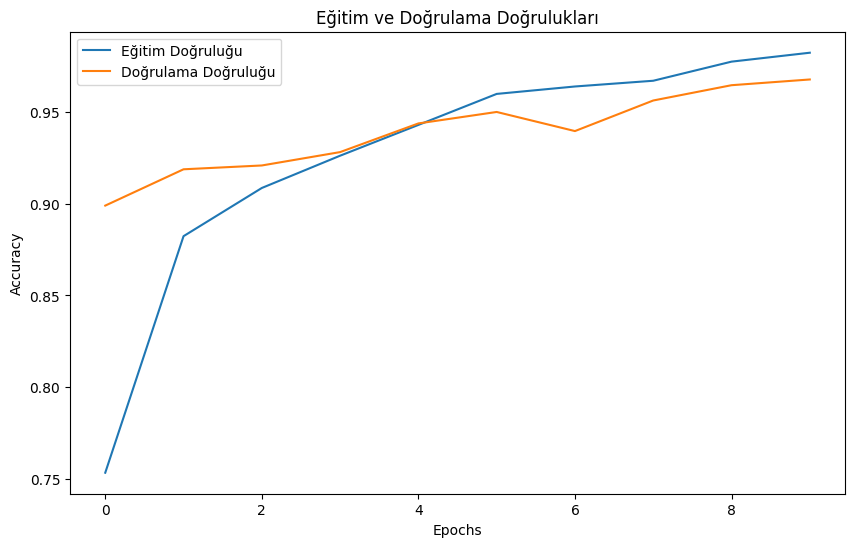

In [50]:
# Eğitim ve doğrulama doğruluklarını görselleştirelim
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğrulukları')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
#Modeli test edelim
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test doğruluğu: {test_acc}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9759 - loss: 0.0626
Test doğruluğu: 0.9733333587646484


75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step


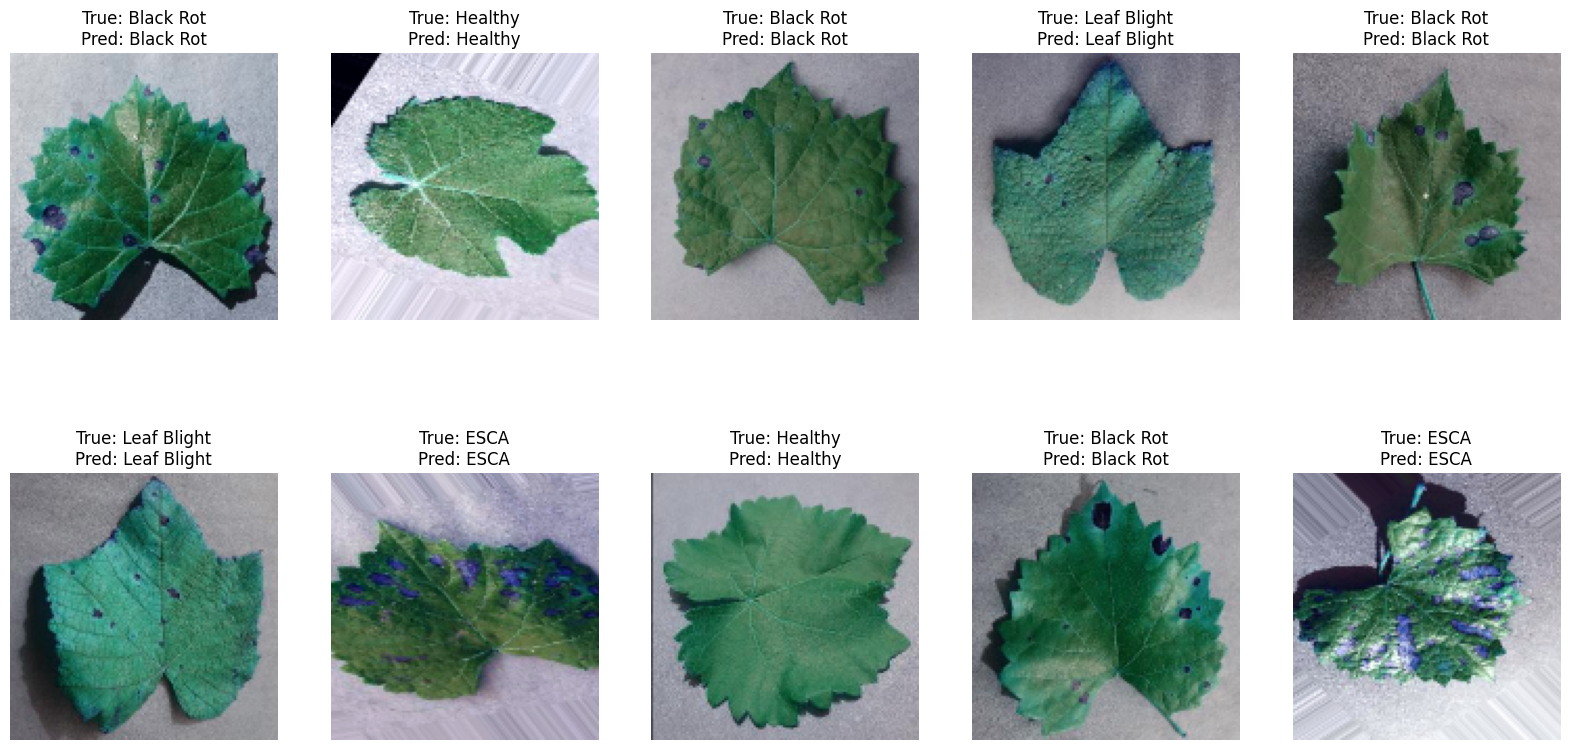

In [52]:
# Model ile tahminler yapma
predictions = model.predict(test_images)

# Bazı tahminleri görselleştirelim
def plot_sample_images(images, labels, predictions, categories, n_samples=10):
    plt.figure(figsize=(20, 10))
    for i in range(n_samples):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        true_label = categories[labels[i]]
        predicted_label = categories[np.argmax(predictions[i])]
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')
    plt.show()

# İlk 10 örneği görselleştirelim
plot_sample_images(test_images, test_labels, predictions, categories, n_samples=10)


In [55]:
#Modeli kaydedelim
model.save('grape_disease_classification_model.h5')